

1. Load and Combine Data

In [39]:
import pandas as pd
from sklearn.impute import KNNImputer

# Load datasets
df1 = pd.read_csv('loan_data_set.csv')
df2 = pd.read_csv('loan_data.csv')

# Align shapes
df2_dropped = df2.drop(df2.columns[-1], axis=1)
combined_df = pd.concat([df1, df2_dropped], axis=0, ignore_index=True)

print(f"Combined DataFrame Shape: {combined_df.shape}")


Combined DataFrame Shape: (10192, 26)


In [47]:
combined_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10192 entries, 0 to 10191
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            10192 non-null  object 
 1   Gender             10192 non-null  object 
 2   Married            10192 non-null  object 
 3   Dependents         10192 non-null  object 
 4   Education          10192 non-null  object 
 5   Self_Employed      10192 non-null  object 
 6   ApplicantIncome    10192 non-null  float64
 7   CoapplicantIncome  10192 non-null  float64
 8   LoanAmount         10192 non-null  float64
 9   Loan_Amount_Term   10192 non-null  float64
 10  Credit_History     10192 non-null  float64
 11  Property_Area      10192 non-null  object 
 12  Loan_Status        10192 non-null  object 
 13  credit.policy      10192 non-null  float64
 14  purpose            10192 non-null  object 
 15  int.rate           10192 non-null  float64
 16  installment        101

In [48]:

#Boxplots (for numerical vs categorical relationships)

In [49]:
#. Handle Missing Values

In [50]:
# Separate numerical and categorical columns
numerical_columns = combined_df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = combined_df.select_dtypes(include=['object']).columns

# Impute numerical data
imputer = KNNImputer(n_neighbors=5)
df_numerical_imputed = pd.DataFrame(imputer.fit_transform(combined_df[numerical_columns]), columns=numerical_columns)
combined_df[numerical_columns] = df_numerical_imputed

# Impute categorical data
from sklearn.impute import SimpleImputer
cat_imputer = SimpleImputer(strategy='most_frequent')
combined_df[categorical_columns] = cat_imputer.fit_transform(combined_df[categorical_columns])

print(combined_df.isnull().sum())


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
dtype: int64


In [51]:
combined_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
count,10192.000000,10192.000000,10192.000000,10192.000000,10192.000000,10192.000000,10192.000000,10192.000000,10192.000000,10192.000000,10192.000000,10192.000000,1.019200e+04,10192.000000,10192.000000,10192.000000,10192.000000
mean,5403.459283,1621.245798,146.407132,342.001884,0.842188,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122
std,1498.286699,717.683598,20.965352,15.813958,0.086446,0.384123,0.026026,200.736458,0.596004,6.673371,36.808921,2420.542853,3.272350e+04,28.126791,2.132934,0.529505,0.254107
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.000000,0.106200,167.340000,10.596635,7.600000,682.000000,2913.000000,3.460500e+03,24.100000,0.000000,0.000000,0.000000
50%,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.000000,0.122640,286.170000,10.932117,12.606679,707.000000,4320.000000,9.368500e+03,46.799236,1.000000,0.000000,0.000000
75%,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.000000,0.139200,412.600000,11.283701,17.610000,732.000000,5610.000000,1.733250e+04,69.100000,2.000000,0.000000,0.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000


In [52]:
combined_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
dtype: int64

2. EDA Analysis

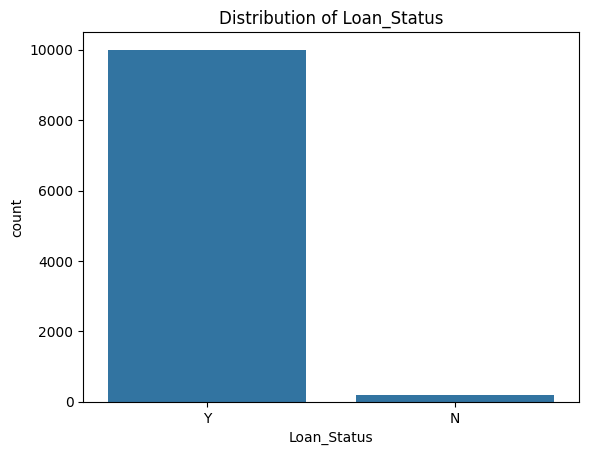

In [53]:
df=combined_df
import matplotlib.pyplot as plt
import seaborn as sns
# Plot distribution of the target variable (Loan_Status)
sns.countplot(x='Loan_Status', data=df)
plt.title('Distribution of Loan_Status')
plt.show()

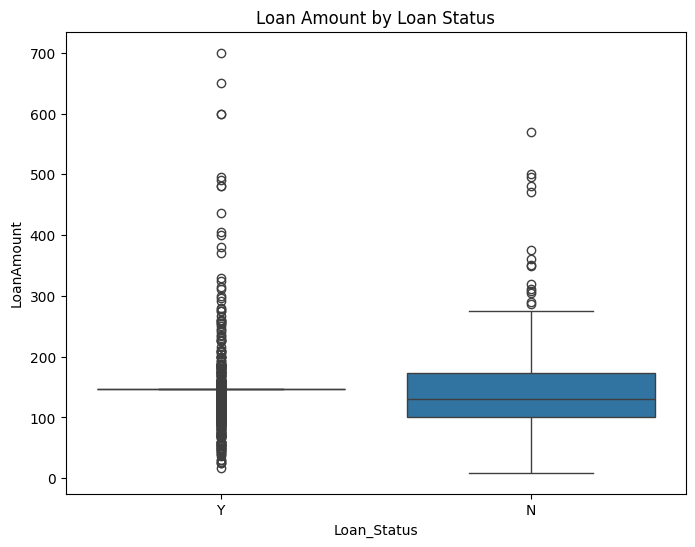

In [54]:
# Boxplot of LoanAmount by Loan_Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df)
plt.title("Loan Amount by Loan Status")
plt.show()

C:\Users\SIMRAN\AppData\Local\Temp\ipykernel_3812\656202615.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




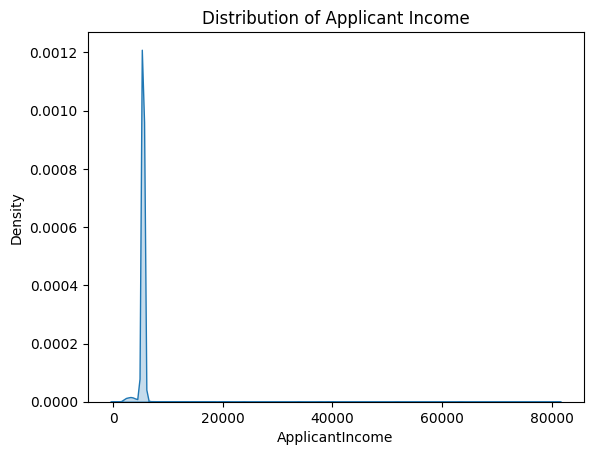

C:\Users\SIMRAN\AppData\Local\Temp\ipykernel_3812\656202615.py:7: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




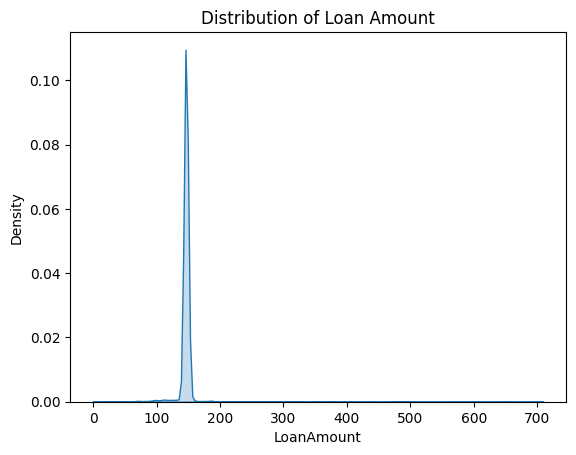

In [60]:
# KDE plots for distributions

sns.kdeplot(df['ApplicantIncome'], shade=True)
plt.title("Distribution of Applicant Income")
plt.show()

sns.kdeplot(df['LoanAmount'], shade=True)
plt.title("Distribution of Loan Amount")
plt.show()

feature importance

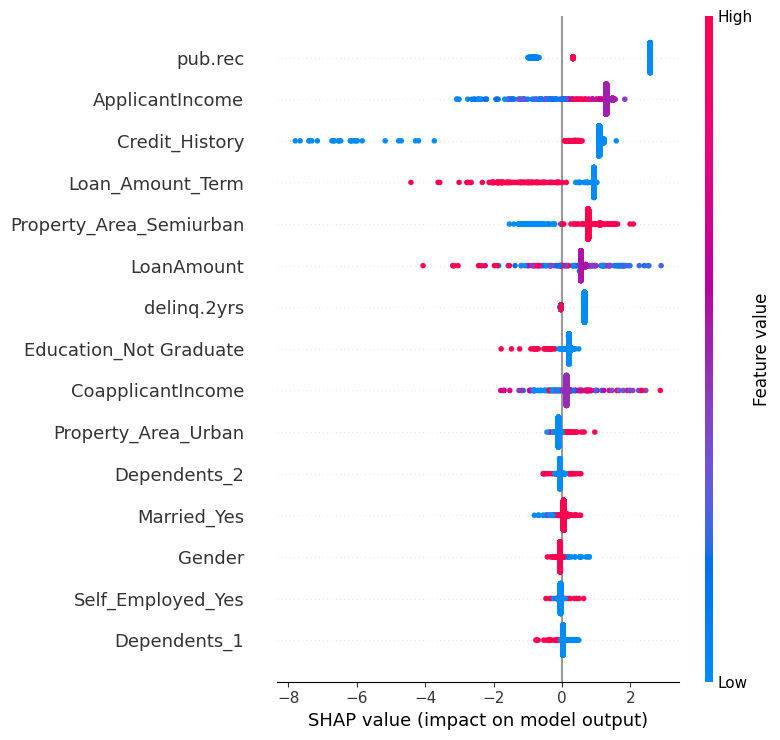

In [76]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

# Create SHAP explainer
explainer = shap.TreeExplainer(model)  # Assuming `model` is the trained XGBoost or RandomForest model
shap_values = explainer.shap_values(X_test)

# For binary classification, shap_values is a list with two elements: [negative class SHAP values, positive class SHAP values]
# We use shap_values[1] for the positive class (assuming binary classification)

shap_values_df = pd.DataFrame(shap_values, columns=X_test.columns)

# Get feature importances and select the top 15
feature_importance = shap_values_df.abs().mean(axis=0)
top_15_features = feature_importance.nlargest(15).index

# Filter the X_test and shap_values to include only the top 15 features
X_test_top_15 = X_test[top_15_features]
shap_values_top_15 = shap_values_df[top_15_features]

# Summary Plot (explains feature importance across the dataset)
shap.summary_plot(shap_values_top_15.values, X_test_top_15)

In [61]:
#3. Encode Categorical Features

In [62]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# One-hot encode other categorical columns
df = pd.get_dummies(df, drop_first=True)

# Encode target variable
df['Loan_Status_Y'] = label_encoder.fit_transform(df['Loan_Status_Y'])


In [63]:
#4. Address Class Imbalance with SMOTE

In [64]:
from imblearn.over_sampling import SMOTE

X = df.drop('Loan_Status_Y', axis=1)
y = df['Loan_Status_Y']

smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [65]:
#5. Adderess Class Imbalance with SMOTE

In [66]:
from imblearn.over_sampling import SMOTE

X = df.drop('Loan_Status_Y', axis=1)
y = df['Loan_Status_Y']

smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [67]:
#6. Feature Selection

In [68]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_resampled, y_resampled)

# Feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importances)


               Feature    Importance
13           revol.bal  7.373634e-02
6        credit.policy  7.216896e-02
12   days.with.cr.line  6.633720e-02
17             pub.rec  6.282227e-02
4     Loan_Amount_Term  6.259322e-02
..                 ...           ...
483   Loan_ID_LP002500  1.142967e-06
81    Loan_ID_LP001222  1.107171e-06
355   Loan_ID_LP002113  9.013998e-07
86    Loan_ID_LP001241  8.414203e-07
404   Loan_ID_LP002243  6.262924e-07

[645 rows x 2 columns]


7. Train-Test Split

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


8. Train XGBoost Model with Class Weights

In [72]:
import xgboost as xgb

model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', scale_pos_weight=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


9. Evaluate the Model

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate and print the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nEvaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}"
print(f"F1-Score: {f1:.4f}")

Confusion Matrix:
[[  19   26]
 [  11 1983]]

Evaluation Metrics:
Accuracy: 0.9819
Precision: 0.9871
Recall: 0.9945
F1-Score: 0.9908


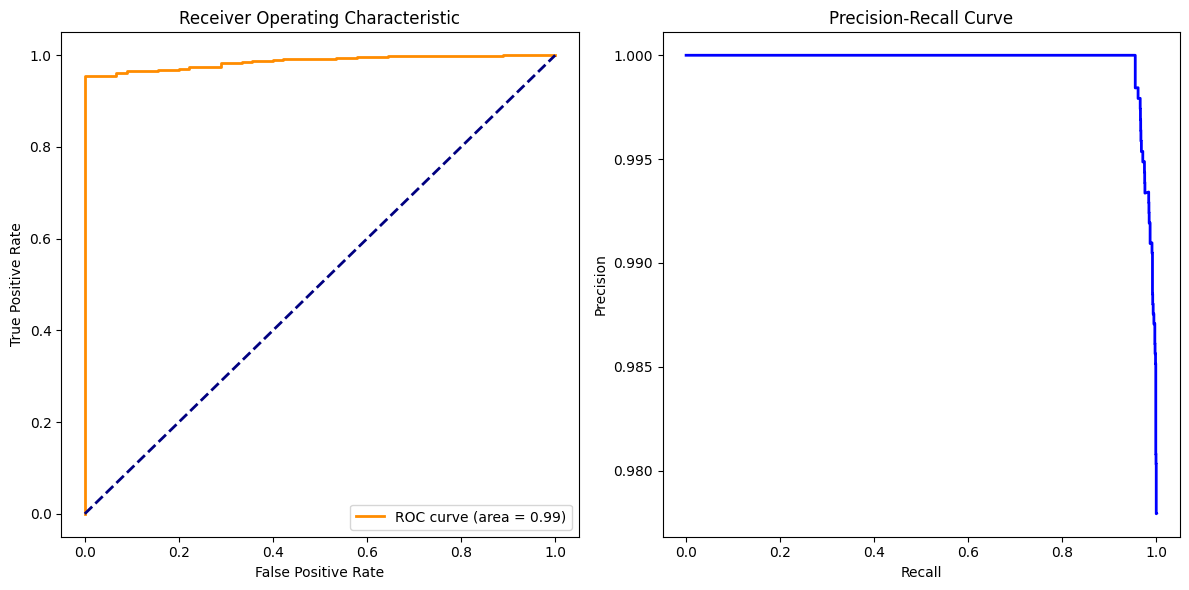

Confusion Matrix:
[[  19   26]
 [  11 1983]]


In [74]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1])

# Plot both
plt.figure(figsize=(12,6))

# Plot ROC curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, model.predict(X_test))
print("Confusion Matrix:")
print(cm)
